In [ ]:
'''
Ridge Regression (L2 Regularization): Ridge or Lasso regression is basically Shrinkage(regularization) techniques, which uses 
                                      different parameters and values to shrink or penalize the coefficients

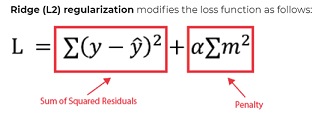

In [ ]:
'''
Hyperparameters :
    -  α (alpha)  : (Regularization Parameter)
        - If Alpha is close to zero,Model will same as OSS or Linear Regression
        - If Alpha is too large, the impact of shrinkage grows and the coefficients B1, B2 ... Bn tends to zero.

### Compare Model Output with Linear Regression and Ridge Regression

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Advertising.csv")
data = data.drop('Unnamed: 0',axis = 1)

X = data.iloc[:,0:1]
y = data.iloc[:,-1]

#plt.scatter(X,y)

# Using Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
pred = model.predict(y[:,np.newaxis])
pd.DataFrame(zip(y,pred))
from sklearn import metrics
print("MSE for Linear Regression:",metrics.mean_squared_error(y,pred))


# Using Ridge Regression(L2)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
pred_ridge = ridge.predict(X)

print("MSE for Ridge:",metrics.mean_squared_error(y,pred_ridge))

# pd.DataFrame(zip(y,pred_ridge,pred),columns=["Actual","Predicted_Ridge","Predicted_Linear"])
pd.DataFrame(zip(y,pred,pred_ridge,(pred -y),(pred_ridge - y)),columns=["Actual","Predicted_Linear","Predicted_Ridge",\
                                                                        "Error_Linear","Error_Ridge"])


MSE for Linear Regression: 64.55624502970082
MSE for Ridge: 10.514277569203893


,Actual,Predicted_Linear,Predicted_Ridge,Error_Linear,Error_Ridge
0,22.1,8.083153,17.931683,-14.016847,-4.168317
1,10.4,7.526975,9.196237,-2.873025,-1.203763
2,9.3,7.474684,7.911335,-1.825316,-1.388665
3,18.5,7.912021,14.232297,-10.587979,-4.267703
4,12.9,7.645816,15.611330,-5.254184,2.711330
...,...,...,...,...,...
195,7.6,7.393872,8.899721,-0.206128,1.299721
196,9.7,7.493699,11.535416,-2.206301,1.835416
197,12.8,7.641063,15.432479,-5.158937,2.632479
198,25.5,8.244778,20.449713,-17.255222,-5.050287


### How alpha Effects coefficients of Input varibales

In [1]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(boston["data"])
Y = boston["target"]
names = boston["feature_names"]

# Create a function called lasso,
def ridge(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        ridge = Ridge(alpha=alpha)
        
        # Fit the lasso regression
        ridge.fit(X, Y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = ridge.coef_
        
    # Return the datafram    
    return df

# Run the function called, Lasso
ridge([.0001, .5, 10,100,1000])

,Feature Name,Alpha = 0.000100,Alpha = 0.500000,Alpha = 10.000000,Alpha = 100.000000,Alpha = 1000.000000
0,CRIM,-0.928145,-0.923962,-0.859051,-0.652004,-0.447377
1,ZN,1.081567,1.073931,0.954975,0.578885,0.369976
2,INDUS,0.140898,0.128952,-0.041327,-0.402318,-0.474161
3,CHAS,0.681740,0.683461,0.707780,0.739944,0.442056
4,NOX,-2.056715,-2.042758,-1.812611,-0.925045,-0.390298
5,RM,2.674231,2.678550,2.742344,2.777933,1.486130
6,AGE,0.019465,0.016273,-0.032383,-0.172802,-0.282829
7,DIS,-3.104042,-3.090634,-2.856756,-1.688537,-0.192575
8,RAD,2.662210,2.626369,2.097823,0.699906,-0.188081
9,TAX,-2.076775,-2.043126,-1.565395,-0.608373,-0.441164
